# Exploratory Data Analysis (EDA)

In [50]:
# Load libraries
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

# Display the first few rows of the dataset
housing.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [51]:
# Summary statistics of numerical variables
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


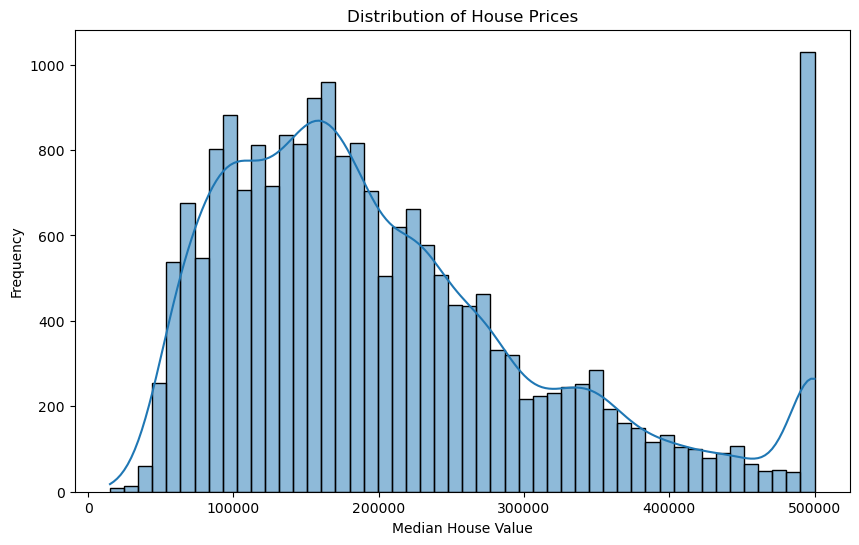

In [52]:
# Plot distribution of house prices (the target variable)
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of the 'median_house_value' column
plt.figure(figsize=(10, 6))
sns.histplot(housing['median_house_value'], kde=True, bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

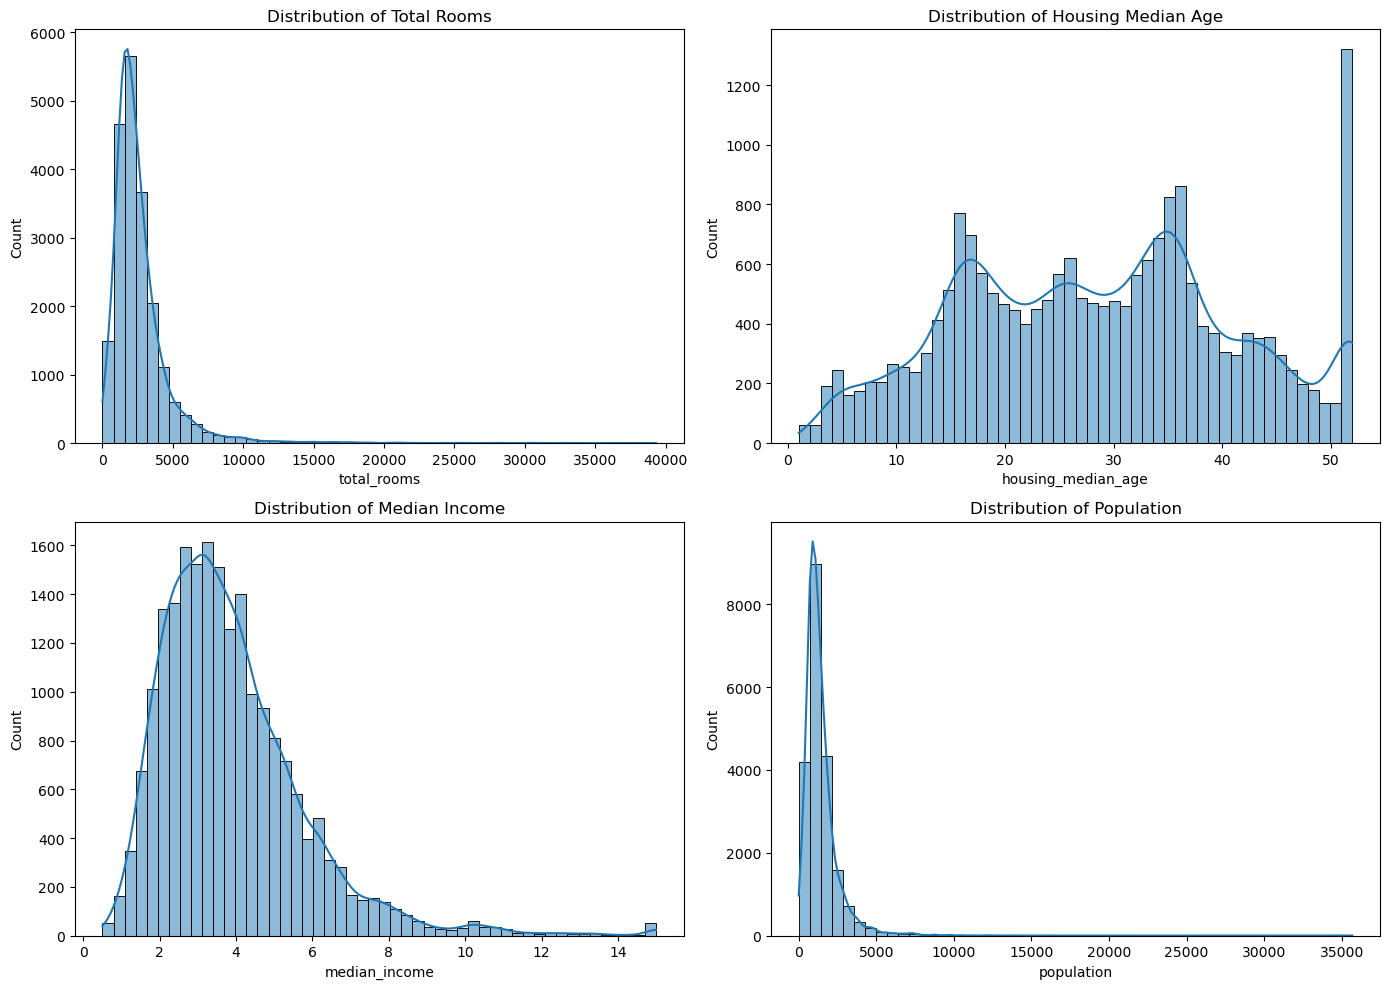

In [53]:
# Create histograms for selected numerical variables (Rooms, Median Age, Median Income, Population)
plt.figure(figsize=(14, 10))

# Total Rooms
plt.subplot(2, 2, 1)
sns.histplot(housing['total_rooms'], kde=True, bins=50)
plt.title('Distribution of Total Rooms')
plt.xlabel('total_rooms')

# Housing Median Age
plt.subplot(2, 2, 2)
sns.histplot(housing['housing_median_age'], kde=True, bins=50)
plt.title('Distribution of Housing Median Age')
plt.xlabel('housing_median_age')

# Median Income
plt.subplot(2, 2, 3)
sns.histplot(housing['median_income'], kde=True, bins=50)
plt.title('Distribution of Median Income')
plt.xlabel('median_income')

# Population
plt.subplot(2, 2, 4)
sns.histplot(housing['population'], kde=True, bins=50)
plt.title('Distribution of Population')
plt.xlabel('population')

plt.tight_layout()
plt.show()


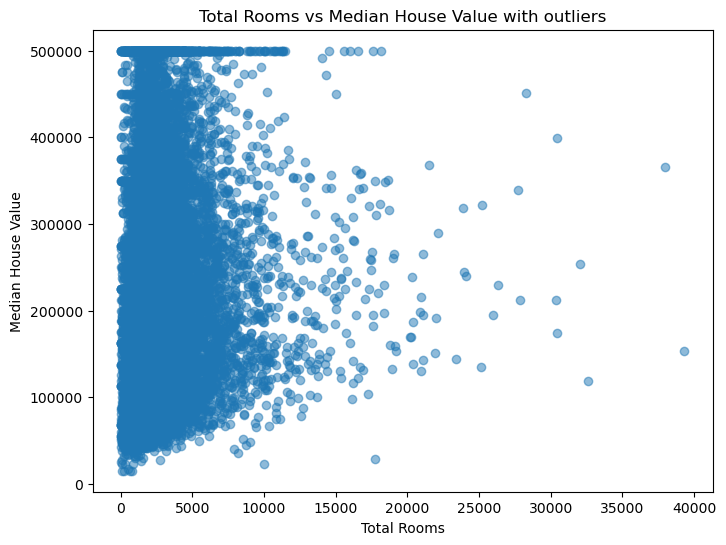

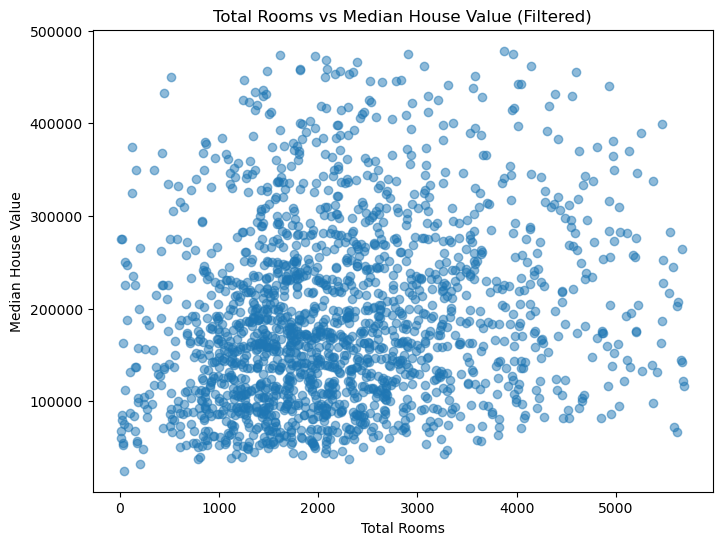

In [54]:
# Scatter plot (antes de eliminar outliers)
plt.figure(figsize=(8, 6))
plt.scatter(housing['total_rooms'], housing['median_house_value'], alpha=0.5)
plt.title('Total Rooms vs Median House Value with outliers')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.show()

# Calcula el IQR para 'total_rooms'
Q1_total_rooms = housing['total_rooms'].quantile(0.25)
Q3_total_rooms = housing['total_rooms'].quantile(0.75)
IQR_total_rooms = Q3_total_rooms - Q1_total_rooms

# Calcula el IQR para 'median_house_value'
Q1_median_house_value = housing['median_house_value'].quantile(0.25)
Q3_median_house_value = housing['median_house_value'].quantile(0.75)
IQR_median_house_value = Q3_median_house_value - Q1_median_house_value

# Define los límites para considerar outliers
lower_bound_rooms = Q1_total_rooms - 1.5 * IQR_total_rooms
upper_bound_rooms = Q3_total_rooms + 1.5 * IQR_total_rooms

lower_bound_value = Q1_median_house_value - 1.5 * IQR_median_house_value
upper_bound_value = Q3_median_house_value + 1.5 * IQR_median_house_value

# Filtra el DataFrame para eliminar outliers
filtered_housing = housing[
    (housing['total_rooms'] >= lower_bound_rooms) & (housing['total_rooms'] <= upper_bound_rooms) &
    (housing['median_house_value'] >= lower_bound_value) & (housing['median_house_value'] <= upper_bound_value)
]

# Toma una muestra del 10% de los datos
sampled_housing = filtered_housing.sample(frac=0.1, random_state=42)

# Scatter plot (Total Rooms vs Median House Value) después de eliminar outliers
plt.figure(figsize=(8, 6))
plt.scatter(sampled_housing['total_rooms'], sampled_housing['median_house_value'], alpha=0.5)
plt.title('Total Rooms vs Median House Value (Filtered)')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.show()


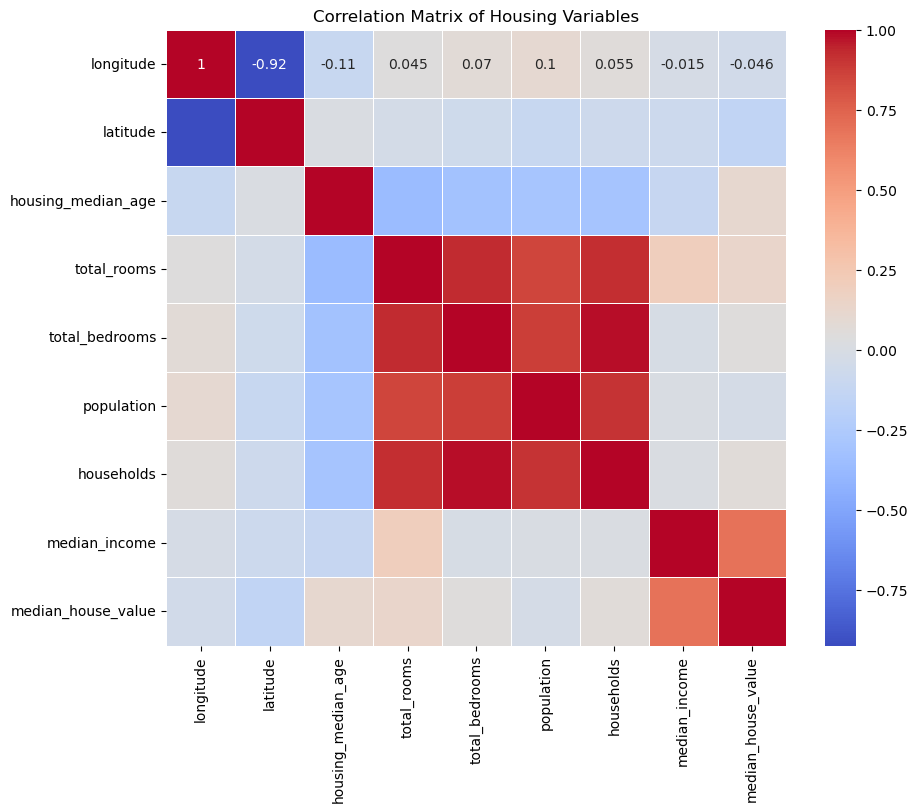

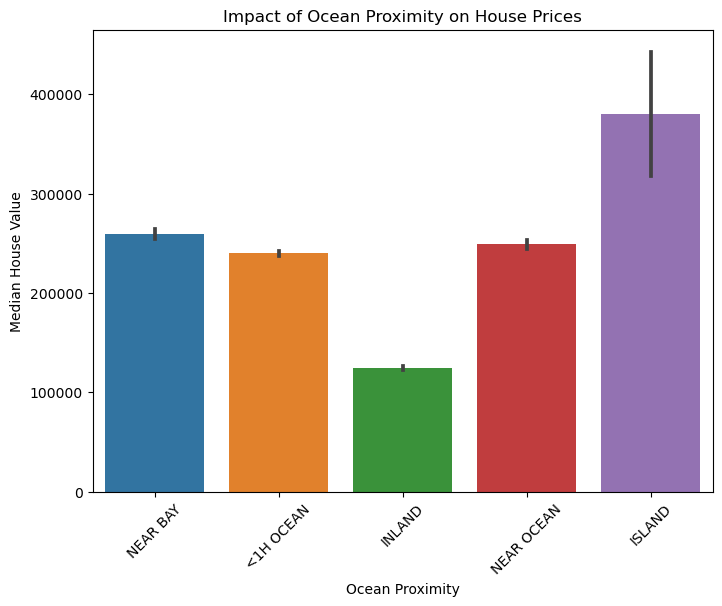

In [55]:
# Correlation matrix to identify influential variables
aux_ls =list(housing.columns)
aux_ls.remove('ocean_proximity')
aux_housing = housing[aux_ls]
plt.figure(figsize=(10, 8))
corr_matrix = aux_housing.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Housing Variables')
plt.show()

# Bar chart to visualize the impact of ocean proximity on house prices
plt.figure(figsize=(8, 6))
sns.barplot(x='ocean_proximity', y='median_house_value', data=housing)
plt.title('Impact of Ocean Proximity on House Prices')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()


# Filter Methods

In [56]:
# Import libraries
import pandas as pd

# Load the housing dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

# Display the first few rows of the dataset
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [57]:
# Exclude categorical variables (e.g., 'ocean_proximity')
housing_num = housing.drop(columns=['ocean_proximity'])

# Calculate the correlation matrix between numerical variables
corr_matrix = housing_num.corr()

# Extract the correlations between numerical predictors and the target variable (median_house_value)
target_corr = corr_matrix["median_house_value"]

# Sort the correlations in descending order to identify influential variables
sorted_corr = target_corr.sort_values(ascending=False)

# Display the influential variables
print(sorted_corr)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [58]:
# Set a threshold for correlation coefficient (adjust as needed)
correlation_threshold = 0.5

# Select influential variables based on the threshold
influential_vars = sorted_corr[abs(sorted_corr) > correlation_threshold]

# Display the selected influential variables
print(influential_vars)


median_house_value    1.000000
median_income         0.688075
Name: median_house_value, dtype: float64


# Chi-Square Test

In [59]:
# Import libraries
import pandas as pd

# Create a sample dataset (you can replace this with your dataset)
data = {
    'Car_Model': ['Sedan', 'SUV', 'Sedan', 'SUV', 'Hatchback', 'SUV', 'Sedan', 'Hatchback', 'Sedan', 'SUV'],
    'Color': ['Red', 'Blue', 'Red', 'Blue', 'Red', 'Blue', 'Red', 'Red', 'Blue', 'Blue'],
    'Fuel_Type': ['Petrol', 'Diesel', 'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Petrol', 'Diesel', 'Petrol', 'Petrol'],
    'Decision': ['Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Display the dataset
print(df)


   Car_Model Color Fuel_Type Decision
0      Sedan   Red    Petrol      Yes
1        SUV  Blue    Diesel      Yes
2      Sedan   Red    Diesel       No
3        SUV  Blue    Petrol       No
4  Hatchback   Red    Diesel      Yes
5        SUV  Blue    Petrol       No
6      Sedan   Red    Petrol       No
7  Hatchback   Red    Diesel      Yes
8      Sedan  Blue    Petrol      Yes
9        SUV  Blue    Petrol       No


In [60]:
# Import necessary library
from scipy.stats import chi2_contingency
import pandas as pd

# Define a function to perform the chi-square test and return the p-value
def perform_chi_square_test(df, variable):
    contingency_table = pd.crosstab(df[variable], df['Decision'])
    print(contingency_table)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

# List of categorical variables for testing
categorical_variables = ['Car_Model', 'Color', 'Fuel_Type']

# Perform the chi-square test for each categorical variable
chi_square_results = {}
for variable in categorical_variables:
    p_value = perform_chi_square_test(df, variable)
    chi_square_results[variable] = p_value

# Display the p-values for each variable
print("Chi-Square Test Results:")
for variable, p_value in chi_square_results.items():
    print(f"{variable}: p-value = {p_value:.4f}")


Decision   No  Yes
Car_Model         
Hatchback   0    2
SUV         3    1
Sedan       2    2
Decision  No  Yes
Color            
Blue       3    2
Red        2    3
Decision   No  Yes
Fuel_Type         
Diesel      1    3
Petrol      4    2
Chi-Square Test Results:
Car_Model: p-value = 0.2231
Color: p-value = 1.0000
Fuel_Type: p-value = 0.5186


In [61]:
# Set a significance level threshold (adjust as needed)
significance_level = 0.5

# Select influential variables based on the significance level
influential_variables = {variable: p_value for variable, p_value in chi_square_results.items() if p_value < significance_level}

# Display the selected influential variables
print("\nSelected Influential Variables (p-value < {}):".format(significance_level))
if influential_variables:
    for variable, p_value in influential_variables.items():
        print(f"{variable}: p-value = {p_value:.4f}")
else:
    print("No variables found with p-value below the significance level.")



Selected Influential Variables (p-value < 0.5):
Car_Model: p-value = 0.2231


# Forward Selection

In [62]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Display the first few rows of the dataset
print(data.head())  # Muestra las primeras filas del dataset


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [63]:

# Split the dataset into features (X) and target (y)
X = data.drop(columns='target')  # Variables independientes
y = data['target']  # Variable dependiente

# Initialize an empty list of selected variables
selected_variables = []

# Define the initial best accuracy as 0
best_accuracy = 0

# Specify the maximum number of iterations (number of variables)
max_iterations = X.shape[1]

# Create a function to train and evaluate the model
def train_and_evaluate(X, y, selected_variables):
    X_selected = X[selected_variables]  # Filtra las variables seleccionadas
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    model = LogisticRegression()  # Inicializa el modelo de regresión logística
    model.fit(X_train, y_train)  # Ajusta el modelo a los datos de entrenamiento
    y_pred = model.predict(X_test)  # Predice las clases para el conjunto de prueba
    accuracy = accuracy_score(y_test, y_pred)  # Calcula la precisión del modelo
    return accuracy

# Perform forward selection
for i in range(max_iterations):
    candidate_variables = [var for var in X.columns if var not in selected_variables]  # Variables candidatas
    variable_accuracies = []  # Lista para almacenar precisiones de variables candidatas

    for var in candidate_variables:
        accuracy = train_and_evaluate(X, y, selected_variables + [var])  # Evalúa la variable candidata
        variable_accuracies.append((var, accuracy))  # Almacena la variable y su precisión
        print(f"Evaluating {var}: Accuracy = {accuracy:.4f}")  # Muestra la precisión para cada variable

    # Sort variables by accuracy in descending order
    variable_accuracies.sort(key=lambda x: x[1], reverse=True)  # Ordena por precisión

    # Select the best-performing variable from candidates
    best_variable, best_accuracy_candidate = variable_accuracies[0]  # Toma la mejor variable

    # Check if the best candidate improves model accuracy
    if best_accuracy_candidate > best_accuracy:
        selected_variables.append(best_variable)  # Añade la mejor variable a las seleccionadas
        best_accuracy = best_accuracy_candidate  # Actualiza la mejor precisión
        print(f"Selected: {best_variable} with Accuracy = {best_accuracy:.4f}")  # Muestra la variable seleccionada
    else:
        break  # Si no hay mejora, termina el bucle

# Display the selected influential variables
print(f"Selected influential variables: {selected_variables}")  # Muestra las variables seleccionadas



Evaluating sepal length (cm): Accuracy = 0.8333
Evaluating sepal width (cm): Accuracy = 0.6000
Evaluating petal length (cm): Accuracy = 1.0000
Evaluating petal width (cm): Accuracy = 1.0000
Selected: petal length (cm) with Accuracy = 1.0000
Evaluating sepal length (cm): Accuracy = 1.0000
Evaluating sepal width (cm): Accuracy = 1.0000
Evaluating petal width (cm): Accuracy = 1.0000
Selected influential variables: ['petal length (cm)']


In [64]:
# Train the final model using the selected variables
final_accuracy = train_and_evaluate(X, y, selected_variables)  # Evalúa el modelo final

# Display the final model's accuracy and selected variables
print(f"Final model accuracy: {final_accuracy:.4f}")  # Muestra la precisión final
print(f"Final selected variables: {selected_variables}")  # Muestra las variables finales seleccionadas

Final model accuracy: 1.0000
Final selected variables: ['petal length (cm)']


# Backward Elimination

Removed: s4 with MSE = 2855.3145
Removed: age with MSE = 2830.2516
Removed: s1 with MSE = 2822.8660
Removed: s2 with MSE = 2800.1597
Removed: bp with MSE = 2792.6282
Final model MSE: 2792.6282
Final selected variables: {'bmi', 'sex', 's3', 's5', 's6'}


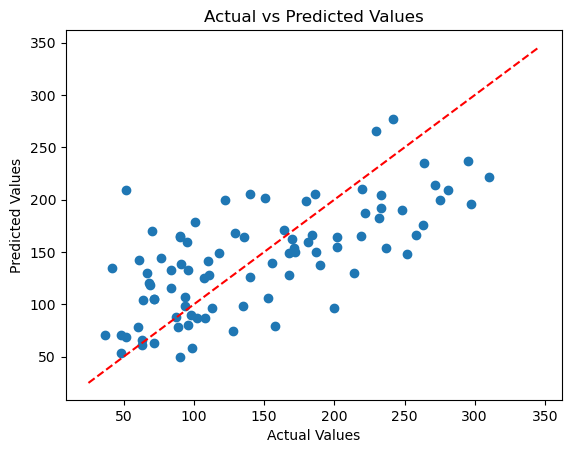

In [65]:
# Import Libraries
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Split the dataset into features (X) and target (y)
X = data.drop(columns='target') 
y = data['target']  # Variable dependiente

# Initialize a set of selected variables with all available variables
selected_variables = set(X.columns) 

# Specify the maximum number of iterations (number of variables)
max_iterations = X.shape[1]

# Define the initial best mean squared error as high
best_mse = float('inf')  #

# Create a function to train and evaluate the model
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()  
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    mse = mean_squared_error(y_test, y_pred)  
    return mse, model, X_test, y_test

# Perform backward elimination
for i in range(max_iterations):
    variable_mses = []

    for var in selected_variables:
        current_selected = list(selected_variables - {var})  
        mse, _, _, _ = train_and_evaluate(X[current_selected], y)  
        variable_mses.append((var, mse))  

    # Sort variables by MSE in ascending order
    variable_mses.sort(key=lambda x: x[1])  

    # Select the worst-performing variable from candidates
    worst_variable, worst_mse_candidate = variable_mses[0]  

    # Check if the worst candidate improves model performance
    if worst_mse_candidate < best_mse:
        selected_variables.remove(worst_variable) 
        best_mse = worst_mse_candidate  
        print(f"Removed: {worst_variable} with MSE = {worst_mse_candidate:.4f}")  
    else:
        break  

# Train the final model using the selected variables
final_mse, final_model, X_test, y_test = train_and_evaluate(X[list(selected_variables)], y)  

# Display the final model's mean squared error and selected variables
print(f"Final model MSE: {final_mse:.4f}")  
print(f"Final selected variables: {selected_variables}")  

# Plot the relationship between actual and predicted values
y_pred_final = final_model.predict(X_test) 
plt.scatter(y_test, y_pred_final)  
plt.xlabel("Actual Values")  
plt.ylabel("Predicted Values")  
plt.title("Actual vs Predicted Values")  
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  
plt.show() 


# Stepwise Selection

In [66]:
# Import libraries
import pandas as pd  
import statsmodels.api as sm  
from sklearn.metrics import mean_squared_error 

# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=";")  # Carga el conjunto de datos desde la URL

# Display the first few rows of the dataset
print(data.head())  


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [67]:

# Split the dataset into features (X) and target (y)
X = data.drop(columns='quality') 
y = data['quality']  

# Initialize an empty list of selected features
selected_features = []  

# Create a function to train and evaluate the model
def train_and_evaluate(X, y, selected_features):
    X_with_constant = sm.add_constant(X[selected_features])  
    model = sm.OLS(y, X_with_constant).fit()  
    y_pred = model.predict(X_with_constant)  
    mse = mean_squared_error(y, y_pred)  
    return mse, model 

# Perform stepwise feature selection
while True:
    candidate_features = [feature for feature in X.columns if feature not in selected_features] 
    feature_mses = []  

    for feature in candidate_features:
        mse, _ = train_and_evaluate(X, y, selected_features + [feature]) 
        feature_mses.append((feature, mse)) 

    # Sort features by MSE in ascending order
    feature_mses.sort(key=lambda x: x[1]) 

    # Select the best-performing feature from candidates
    best_feature, best_mse_candidate = feature_mses[0] 

    # Check if the best candidate improves the model based on AIC
    _, current_model = train_and_evaluate(X, y, selected_features)  
    current_aic = current_model.aic 
    _, updated_model = train_and_evaluate(X, y, selected_features + [best_feature]) 
    updated_aic = updated_model.aic  

    if updated_aic < current_aic:  # Compara el AIC del modelo actualizado con el actual
        selected_features.append(best_feature) 
    else:
        break  

# Display the selected influential features
print(f"Selected influential features: {selected_features}") 


Selected influential features: ['alcohol', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'fixed acidity']


In [68]:
# Train the final model using the selected features
final_mse, final_model = train_and_evaluate(X, y, selected_features)  # Evalúa el modelo final

# Display the final model's Mean Squared Error and selected features
print(f"Final model MSE: {final_mse:.4f}")  # Muestra el MSE final
print(f"Final selected features: {selected_features}")  # Muestra las características finales seleccionadas

# Display the summary of the final model (including coefficients)
print(final_model.summary())  # Muestra el resumen del modelo final, incluyendo coeficientes y estadísticas


Final model MSE: 0.5632
Final selected features: ['alcohol', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'fixed acidity']
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:13:59   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err

# Integrated Feature Selection with Lasso Regression

In [69]:
# Import Libraries
import pandas as pd 
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import Lasso, Ridge 
from sklearn.metrics import mean_squared_error 

# Load the California Housing Prices dataset
data = fetch_california_housing()  
X = pd.DataFrame(data.data, columns=data.feature_names)  
y = data.target  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Display the first few rows of the dataset
print(X.head()) 


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [70]:
# Initialize and fit a Lasso regression model with regularization parameter alpha
alpha = 1 
lasso_model = Lasso(alpha=alpha)  
lasso_model.fit(X_train, y_train)  

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test) 

# Calculate Mean Squared Error to evaluate model performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)  
print(f"Lasso Regression MSE: {mse_lasso:.4f}") 

# Display selected features (with non-zero coefficients) for Lasso
selected_features_lasso = X.columns[lasso_model.coef_ != 0]  
print(f"Selected features by Lasso: {selected_features_lasso.tolist()}")  

Lasso Regression MSE: 0.9380
Selected features by Lasso: ['MedInc', 'HouseAge', 'Population']


In [71]:
# Initialize and fit a Ridge regression model with regularization parameter alpha
ridge_model = Ridge(alpha=alpha)  
ridge_model.fit(X_train, y_train) 

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test) 

# Calculate Mean Squared Error to evaluate model performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)  
print(f"Ridge Regression MSE: {mse_ridge:.4f}") 


Ridge Regression MSE: 0.5558
